In [ ]:
from fastai import *
from fastai.vision import *

import warnings
warnings.filterwarnings('ignore', message='Default grid_sample and affine_grid behavior will be changed ')

In [ ]:
path = Path('/home/kushaj/Desktop/Data/')
train_path = path/'trashdata/'
test_path = path/'trashtest'

print(train_path.ls())
print(test_path.ls())

[PosixPath('/home/kushaj/Desktop/Data/trashdata/metal'), PosixPath('/home/kushaj/Desktop/Data/trashdata/resnet_256.pkl'), PosixPath('/home/kushaj/Desktop/Data/trashdata/glass'), PosixPath('/home/kushaj/Desktop/Data/trashdata/paper'), PosixPath('/home/kushaj/Desktop/Data/trashdata/.DS_Store'), PosixPath('/home/kushaj/Desktop/Data/trashdata/densenet_256.pkl'), PosixPath('/home/kushaj/Desktop/Data/trashdata/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashdata/models'), PosixPath('/home/kushaj/Desktop/Data/trashdata/plastic')]
[PosixPath('/home/kushaj/Desktop/Data/trashtest/metal'), PosixPath('/home/kushaj/Desktop/Data/trashtest/glass'), PosixPath('/home/kushaj/Desktop/Data/trashtest/paper'), PosixPath('/home/kushaj/Desktop/Data/trashtest/cardboard'), PosixPath('/home/kushaj/Desktop/Data/trashtest/plastic')]


In [ ]:
src = (ImageList.from_folder(train_path)
                .split_by_rand_pct()
                .label_from_folder())

data = (src.transform(get_transforms(flip_vert=True), size=(128, 128))
           .databunch(num_workers=8, val_bs=64)
           .normalize(imagenet_stats))

data_test = (ImageList.from_folder(test_path)
                      .split_none()
                      .label_from_folder()
                      .transform(size=(256, 256))
                      .databunch(num_workers=8, val_bs=32)
                      .normalize(imagenet_stats))

data_test.valid_dl = data_test.train_dl
data_test.train_dl = None

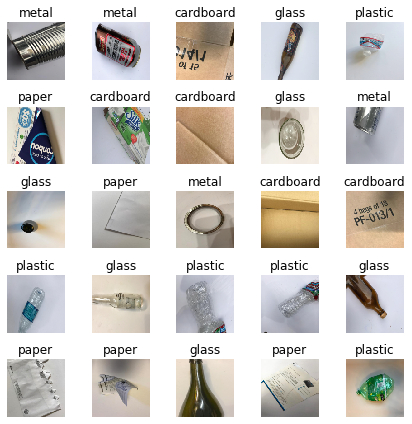

In [ ]:
data.show_batch(figsize=(6,6))

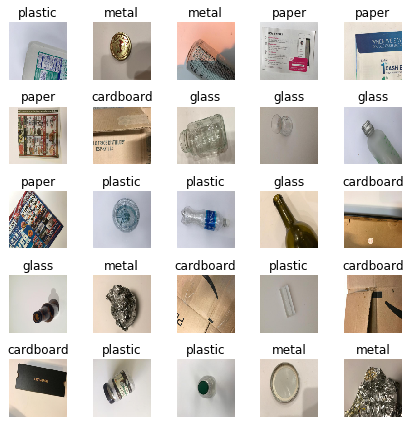

In [ ]:
data_test.show_batch(figsize=(6,6))

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], callback_fns=ShowGraph)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


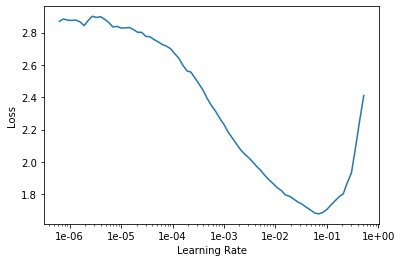

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.240285,0.720590,0.808411,00:22
1,0.899810,1.214472,0.721963,00:19
2,0.772217,1.135065,0.684579,00:19
3,0.643762,0.567924,0.817757,00:19
4,0.554417,0.528283,0.834112,00:19
5,0.457367,0.399564,0.871495,00:19
6,0.385859,0.360097,0.871495,00:19
7,0.316110,0.287333,0.904206,00:19
8,0.260745,0.237594,0.915888,00:18
9,0.206919,0.230982,0.920561,00:19


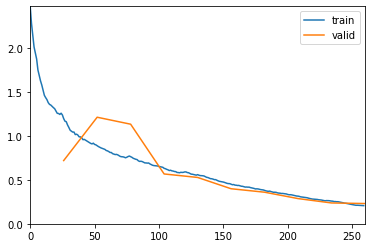

In [ ]:
learn.fit_one_cycle(10, max_lr=1e-2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


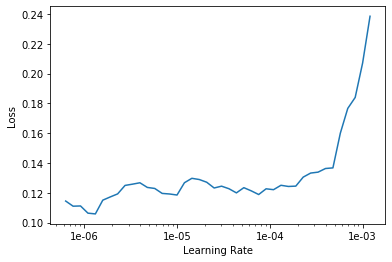

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.114870,0.231770,0.913551,00:25
1,0.117235,0.209115,0.922897,00:25
2,0.108598,0.218766,0.918224,00:25
3,0.103705,0.185069,0.936916,00:25
4,0.108748,0.195118,0.927570,00:25
5,0.111536,0.216450,0.936916,00:25
6,0.104349,0.203039,0.936916,00:25
7,0.094993,0.236374,0.934579,00:25
8,0.086245,0.226186,0.934579,00:25
9,0.073581,0.208362,0.941589,00:25


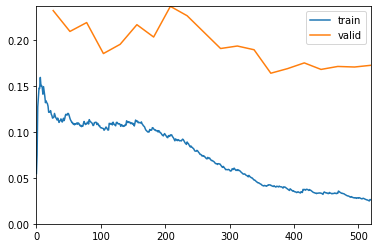

In [ ]:
learn.fit_one_cycle(20, max_lr=5e-5)

In [ ]:
data = (src.transform(get_transforms(flip_vert=True), size=(256, 256))
           .databunch(num_workers=8, bs=16)
           .normalize(imagenet_stats))

In [ ]:
# learn.load(train_path/'models'/'second')

learn.data = data

In [ ]:
learn.freeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


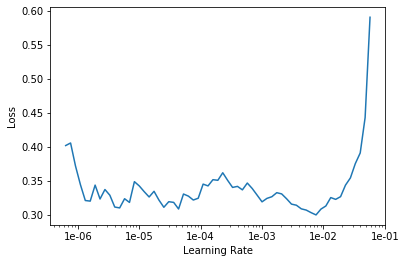

In [ ]:
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.240370,0.087983,0.976636,01:07
1,0.227742,0.072516,0.978972,01:04
2,0.257224,0.081079,0.976636,01:04
3,0.221615,0.106564,0.971963,01:05
4,0.192325,0.095962,0.969626,01:05
5,0.167604,0.065403,0.978972,01:05
6,0.173016,0.070006,0.988318,01:08
7,0.112345,0.069852,0.983645,01:05
8,0.132677,0.077100,0.985981,01:04
9,0.119517,0.067366,0.985981,01:05


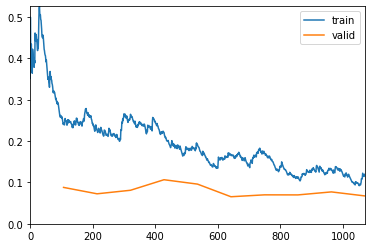

In [ ]:
learn.fit_one_cycle(10, max_lr=1e-3)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


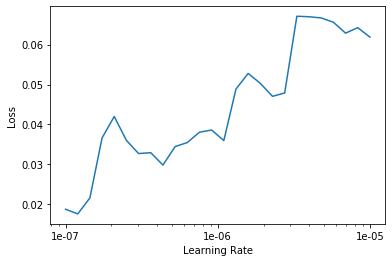

In [ ]:
learn.recorder.plot(skip_start=0)

In [ ]:
learn.save('freeze_256')

epoch,train_loss,valid_loss,accuracy,time
0,0.117442,0.078296,0.981308,01:32
1,0.101243,0.075004,0.985981,01:31
2,0.088597,0.072964,0.983645,01:32
3,0.118006,0.074853,0.985981,01:32
4,0.088820,0.069188,0.985981,01:32


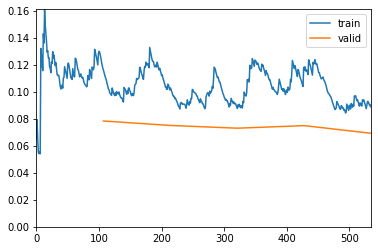

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-7)

In [ ]:
learn.save('unfreeze_256')

In [ ]:
learn.load('resnet_256')

In [ ]:
learn.export('resnet_256.pkl')

In [ ]:
learn.validate(dl=data_test.valid_dl)

[0.07836932, tensor(0.9740)]